# Bank Churn Prediction

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('data/bank-churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [7]:
df.Geography.unique().tolist()

['France', 'Spain', 'Germany']

<Axes: >

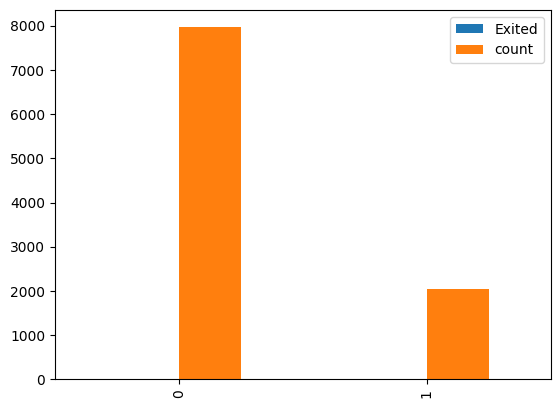

In [8]:
count_exited = df['Exited'].value_counts().reset_index()
count_exited.plot(kind='bar')

Seems like our target is not balanced. We need to balance the data to optimize model performance using imblearn library

In [9]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler

# Data Processing

In [10]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Geography'] = encoder.fit_transform(df['Geography'])
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Card Type'] = encoder.fit_transform(df['Card Type'])

Text(0.5, 1.0, 'Correlation Heatmap')

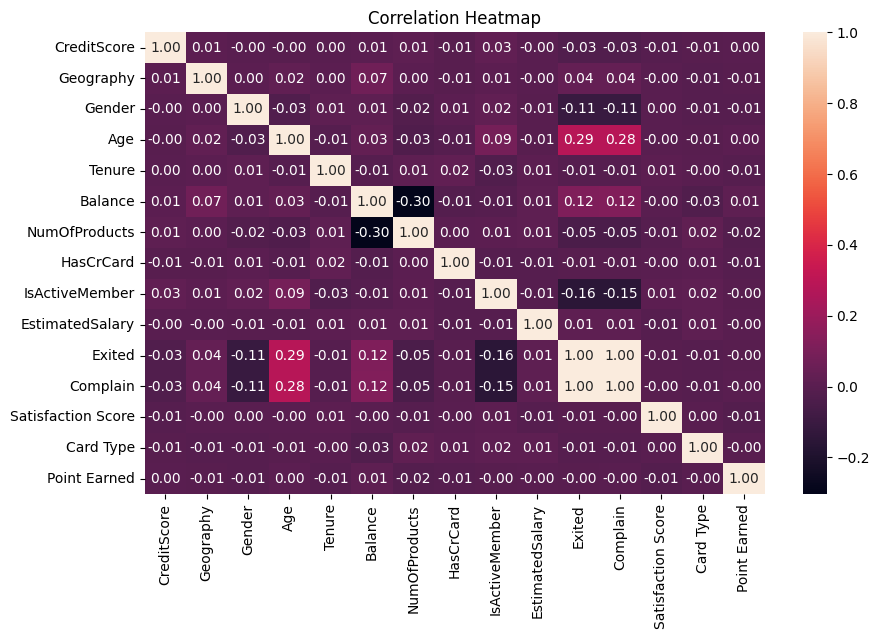

In [12]:
corr = df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt='.2F')
plt.title("Correlation Heatmap")

We will drop the features that have low correlation with the target feature

In [13]:
X = df[['Age', 'CreditScore', 'Balance', 'EstimatedSalary']]
y = df['Exited']

Handle imbalanced data in target feature by using the RandomOverSampler()

In [14]:
ros = RandomOverSampler()
X, y = ros.fit_resample(X,y)

Split the dataset into train and test dataset with 80:20 ratio

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Modelling

Define the model by using RandomForestClassifier

In [16]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

Evaluate the metrics using by see the accuracy and classification report

In [17]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.932182103610675
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1625
           1       0.89      0.98      0.93      1560

    accuracy                           0.93      3185
   macro avg       0.94      0.93      0.93      3185
weighted avg       0.94      0.93      0.93      3185



# Conclusion
- After train the model we got overall 92% accuracy to predict churn probability using the given dataset.

- From the given dataset we can see that 'Age', 'CreditScore', 'Geography', 'Balance', 'EstimatedSalary' have the biggest correlation if the customer gonna churn or not.

In [18]:
import joblib
joblib.dump(model, 'bank-churn-model.pkl')
print('model saved!')

model saved!
